In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chairr/chair.jpg


In [6]:
# !pip install torch torchvision pillow
# !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'
# !pip install 'git+https://github.com/facebookresearch/pifuhd.git'
!git clone https://github.com/facebookresearch/pifuhd.git

Cloning into 'pifuhd'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 222 (delta 2), reused 1 (delta 0), pack-reused 213
Receiving objects: 100% (222/222), 409.82 KiB | 2.42 MiB/s, done.
Resolving deltas: 100% (106/106), done.


In [11]:
# !git clone https://github.com/facebookresearch/pifuhd.git
%cd pifuhd

/kaggle/working/pifuhd


In [12]:
!pip install torch torchvision scikit-image


In [14]:
!pip install opencv-python
!pip install matplotlib

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to your input image
input_image_path = "/kaggle/input/chairr/chair.jpg"

# Load the input image
image = cv2.imread(input_image_path)


In [18]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform stereo matching to estimate disparity
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(gray, gray)

# Normalize and scale the disparity map
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

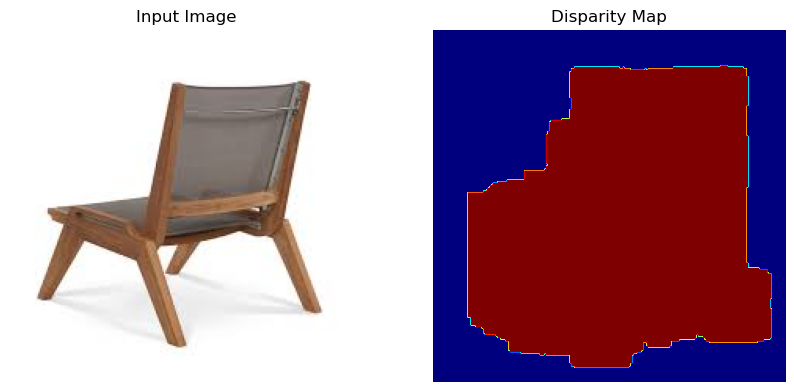

In [19]:

# Display the input image and disparity map
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(disparity_normalized, cmap='jet')
ax[1].set_title('Disparity Map')
ax[1].axis('off')
plt.show()
